# Hodgkin Huxley 1952 numerical simulations
Feb 9, 2023

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import hh
import importlib
importlib.reload(hh)
from ipywidgets import *
%matplotlib widget

## 

## Simulating the HH experience

number of timepoints = 8000


Button(description='Run', icon='check', style=ButtonStyle(), tooltip='Run')

BoundedFloatText(value=0.1, description='dt', max=1.0, min=0.01, step=0.01)

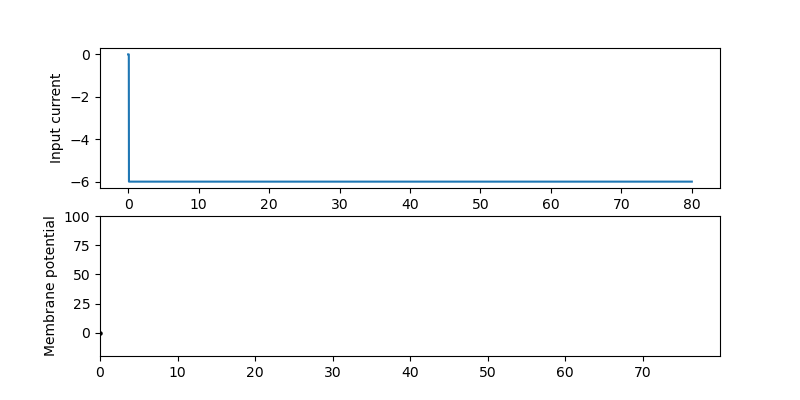

In [2]:
neuron = hh.HH(tFinal=80)
neuron.initialize()
print(f'number of timepoints = {len(neuron.time)}')
arr_Iext = np.zeros(neuron.time.shape[0])
arr_Iext[10:] = -6

dt_input = widgets.BoundedFloatText(value=0.1, min=0.01, max=1.0, step=0.01, description='dt', disabled=False)
button = widgets.Button(description='Run', disabled=False, button_style='', tooltip='Run', icon='check')

display(button)
display(dt_input)
fig, axs = plt.subplots(2, 1, figsize=(8, 4))
axs[0].plot(neuron.time, arr_Iext)
axs[0].set_ylabel('Input current')
ax = axs[1]
ax.set_xlim(0, neuron.time.max())
ax.set_ylim(-20, 100)
ax.scatter(0, -neuron.arr_V[0], s=5, c='k')
ax.set_ylabel('Membrane potential')

i = 0
def on_button_clicked(b):
    global i
    global neuron
    global arr_Iext
    for iteration in range(500):
        neuron.dt = dt_input.value
        Ik, Ina, Il = neuron.update_currents(i)
        neuron.arr_V[i+1] = neuron.update_voltage(Ik, Ina, Il, arr_Iext[i], i)
        ax.scatter(neuron.time[i], -neuron.arr_V[i], s=5, c='C4')
        i+=1
        fig.canvas.draw_idle()

button.on_click(on_button_clicked)


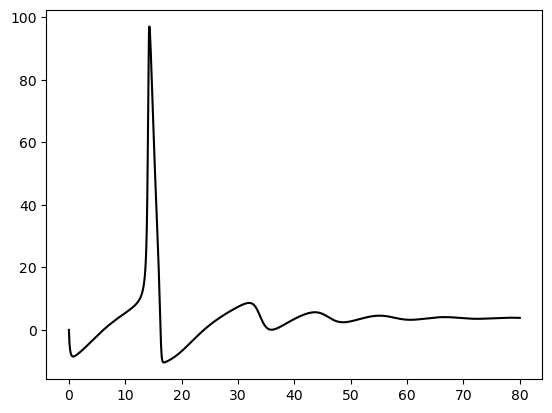

In [3]:
# What the above graph should look like
%matplotlib inline
neuron = hh.HH(tFinal=80)
neuron.initialize()
neuron.simulate(arr_Iext)
plt.figure()
plt.plot(neuron.time, -neuron.arr_V, 'k')
plt.show()
%matplotlib widget

#### "The step value had to be very small initially (since there are no differences at t = 0) and it also had to be changed repeatedly during a run, because the differences became unmanageable if it was too large. It varied between about 0.01 ms at the beginning of a run or 0.02 ms during the rising phase of the action potential, and 1 ms during the small oscillations which follow the spike."

Hodgkin & Huxley

## Simulate constant current inputs of varying amplitudes

In [4]:
# Precompute outputs
ls_Iexts = []
ls_arr_outs = []
for Iamp in np.arange(-3, -14, -0.25):
    neuron = hh.HH(tFinal=100)
    neuron.initialize()
    
    Iext = np.zeros(neuron.time.shape[0])
    Iext[100:] = Iamp
    
    neuron.simulate(Iext)
    ls_Iexts.append(Iext)

    arr_append = np.dstack((neuron.arr_h, neuron.arr_m, neuron.arr_n, neuron.arr_V))
    ls_arr_outs.append(arr_append)

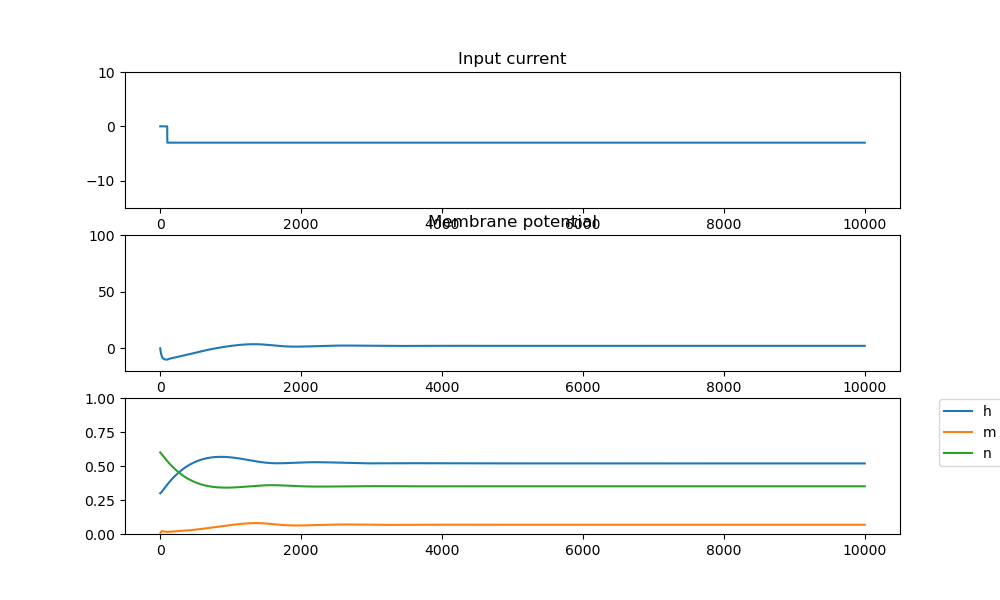

interactive(children=(IntSlider(value=0, description='current', max=43), Output()), _dom_classes=('widget-inte…

<function __main__.update(current=0)>

In [7]:
# Interactive plot
idx = 0
arr_out = ls_arr_outs[idx].squeeze()
Iext = ls_Iexts[idx]
fig = plt.figure(figsize=(10, 6))
ax1 = fig.add_subplot(3, 1, 1)
l1 = ax1.plot(Iext)
ax1.set_ylim(-15, 10)
ax1.set_title(f'Input current')# Title doesn't dynamically update  = {Iext.max():.2f}')

ax = fig.add_subplot(3, 1, 2)
l2 = ax.plot(-arr_out[:, 3])
ax.set_ylim(-20, 100)
ax.set_title('Membrane potential')

ax = fig.add_subplot(3, 1, 3)
l3 = ax.plot(arr_out[:, 0], label='h')
l4 = ax.plot(arr_out[:, 1], label='m')
l5 = ax.plot(arr_out[:, 2], label='n')
ax.legend(loc=(1.05, 0.5))
ax.set_ylim(0, 1)
plt.subplots_adjust(hspace=0.5)

def update(current=0):
    idx = current
    arr_out = ls_arr_outs[idx].squeeze()
    Iext = ls_Iexts[idx]
    l1[0].set_ydata(Iext)
    l2[0].set_ydata(-arr_out[:, 3])
    l3[0].set_ydata(arr_out[:, 0])
    l4[0].set_ydata(arr_out[:, 1])
    l5[0].set_ydata(arr_out[:, 2])
    # ax1.set_title(f'Input current = {Iext.max():.2f}')
    fig.canvas.draw_idle()

interact(update, current=(0, len(ls_Iexts)-1, 1))
plt.show()

## Why do we see the sudden spiking behavior?

## What do you notice about the refractory period?

In [110]:
# Voltage clamp
# Precompute outputs
ls_Vclamp = []
ls_arr_outs = []
for Vamp in np.arange(-50, 50, 10):
    neuron = hh.HH(tFinal=100, TimeStep=0.01)
    neuron.initialize()
    
    Vclamp = np.zeros(neuron.time.shape[0]) - 65
    Vclamp[1000:2000] = Vamp
    
    neuron.simulate_Vclamp(-Vclamp)
    ls_Vclamp.append(Vclamp)

    arr_append = np.dstack((neuron.arr_h, neuron.arr_m, neuron.arr_n, neuron.arr_Ina, neuron.arr_Il, neuron.arr_Ik))
    ls_arr_outs.append(arr_append)

interactive(children=(IntSlider(value=0, description='voltage', max=9), Output()), _dom_classes=('widget-inter…

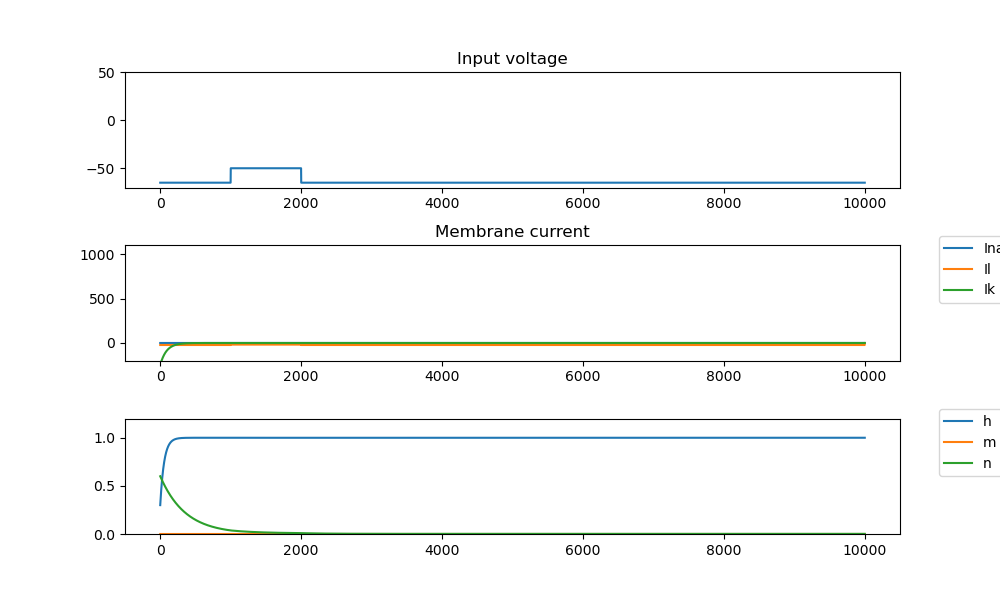

In [112]:
# Interactive plot
%matplotlib widget
idx = 0
arr_out = ls_arr_outs[idx].squeeze()
Vclamp = ls_Vclamp[idx]
fig = plt.figure(figsize=(10, 6))
ax1 = fig.add_subplot(3, 1, 1)
l1 = ax1.plot(Vclamp)
ax1.set_ylim(-70, 50)
ax1.set_title(f'Input voltage')# Title doesn't dynamically update  = {Iext.max():.2f}')

ax = fig.add_subplot(3, 1, 2)
l2 = ax.plot(-arr_out[:, 3], label='Ina')
l2b = ax.plot(-arr_out[:, 4], label='Il')
l2c = ax.plot(-arr_out[:, 5], label='Ik')
ax.set_ylim(-200, 1100)
ax.set_title('Membrane current')
ax.legend(loc=(1.05, 0.5))

ax = fig.add_subplot(3, 1, 3)
l3 = ax.plot(arr_out[:, 0], label='h')
l4 = ax.plot(arr_out[:, 1], label='m')
l5 = ax.plot(arr_out[:, 2], label='n')
ax.legend(loc=(1.05, 0.5))
ax.set_ylim(0, 1.2)
plt.subplots_adjust(hspace=0.5)

def update(voltage=0):
    idx = voltage
    arr_out = ls_arr_outs[idx].squeeze()
    Vclamp = ls_Vclamp[idx]
    l1[0].set_ydata(Vclamp)
    l2[0].set_ydata(arr_out[:, 3])
    l2b[0].set_ydata(-arr_out[:, 4])
    l2c[0].set_ydata(-arr_out[:, 5])
    l3[0].set_ydata(arr_out[:, 0])
    l4[0].set_ydata(arr_out[:, 1])
    l5[0].set_ydata(arr_out[:, 2])
    fig.canvas.draw_idle()

interact(update, voltage=(0, len(ls_Vclamp)-1, 1))
plt.show()